<a href="https://colab.research.google.com/github/ousabu/aiousama/blob/master/Rasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 0. 라이브러리 추가
from sklearn.datasets import load_boston
boston = load_boston()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
import numpy as np


In [9]:
# 1. 데이터 분리
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 12)

In [10]:
# 2. Lasso modelling

## 2-1 default -> alpha = 1.0
lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(lasso.score(X_train,y_train)))
print("테스트 세트 점수 : {:.3f}".format(lasso.score(X_test,y_test)))
print('사용한 특성의 수 : {}'.format(np.sum(lasso.coef_ != 0)))
# 결과 : 훈련 세트 점수 : 0.678 테스트 세트 점수 : 0.586 사용한 특성의 수 : 10

훈련 세트 점수 : 0.678
테스트 세트 점수 : 0.586
사용한 특성의 수 : 10


In [11]:
## 2-2 alpha = 0.1
lasso01 = Lasso(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(lasso01.score(X_train,y_train)))
print("테스트 세트 점수 : {:.3f}".format(lasso01.score(X_test,y_test)))
print('사용한 특성의 수 : {}'.format(np.sum(lasso01.coef_ != 0)))
# 결과 : 훈련 세트 점수 : 0.736 테스트 세트 점수 : 0.693 사용한 특성의 수 : 11

훈련 세트 점수 : 0.736
테스트 세트 점수 : 0.693
사용한 특성의 수 : 11


In [22]:
## 2-3 alpha = 0.01
lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(lasso001.score(X_train,y_train)))
print("테스트 세트 점수 : {:.3f}".format(lasso001.score(X_test,y_test)))
print('사용한 특성의 수 : {}'.format(np.sum(lasso001.coef_ != 0)))
# 결과 : 훈련 세트 점수 : 0.748 테스트 세트 점수 : 0.708 사용한 특성의 수 : 13

훈련 세트 점수 : 0.748
테스트 세트 점수 : 0.708
사용한 특성의 수 : 13


In [23]:
## 2-4 alpha = 10
lasso10 = Lasso(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(lasso10.score(X_train,y_train)))
print("테스트 세트 점수 : {:.3f}".format(lasso10.score(X_test,y_test)))
print('사용한 특성의 수 : {}'.format(np.sum(lasso10.coef_ != 0)))
# 결과 : 훈련 세트 점수 : 0.557 테스트 세트 점수 : 0.464 사용한 특성의 수 : 5

훈련 세트 점수 : 0.557
테스트 세트 점수 : 0.464
사용한 특성의 수 : 5


In [24]:
lasso10.coef_

array([-0.        ,  0.02021789, -0.        ,  0.        , -0.        ,
        0.        ,  0.00267733, -0.        ,  0.        , -0.00848569,
       -0.        ,  0.00988535, -0.59614674])

In [25]:
np.sum(lasso10.coef_)

-0.571851861745833

In [26]:
lasso10.coef_ != 0

array([False,  True, False, False, False, False,  True, False, False,
        True, False,  True,  True])

In [27]:
np.sum(lasso10.coef_ != 0)

5

In [28]:
np.array([True,True,True])

array([ True,  True,  True])

In [29]:
sum(np.array([True,True,True]))

3

In [31]:
import matplotlib.pyplot as plt


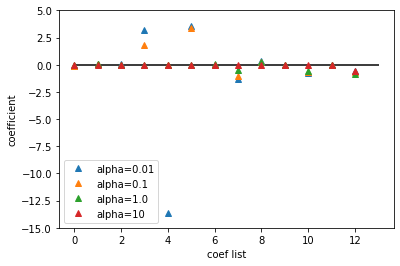

In [33]:
# 그래프 확인
plt.plot(lasso001.coef_,"^", label="alpha=0.01")
plt.plot(lasso01.coef_,"^", label="alpha=0.1")
plt.plot(lasso.coef_,"^", label="alpha=1.0")
plt.plot(lasso10.coef_,"^", label="alpha=10")
plt.xlabel("coef list")
plt.ylabel("coefficient")
plt.hlines(0,0,len(lasso.coef_))
plt.ylim(-15,5)
plt.legend()
plt.show()

- alpha 값이 커질 수록 규제가 커지게 되며 복잡한 모델을 만든다.

- 위의 alpha값의 변화에 따라 점수를 확인하면 alpha가 작아질 수록 점수가 좋은 것을 확인 할 수있다.

이때, 값이 무한히 낮아지면 다시 점수가 나빠지는 과대적합이 발생 할 수도 있다.

- 그래프를 확인해보면 0의 값을 가진 것을 확인 할 수 있다. 이것이 Ridge와의 차이점이다.